# Pymaceuticals Inc.
---

### Analysis

- There is a strong correlation between "Weight (g)","Average Tumor Volume (mm3)", The Pearson correlation coefficient between this datasets is 0.84 wich shows a strong correlation between the data,a positive that imply that as x increases, so does y
- Analyzing thebox plot that shows the distrubution of the tumor volume for each treatment we can infer that Capomulin and Ramicane are the best drug treatment because the final tumor volume's data are around lower values.
- Capomulin and Ramicane are the drug treatments with more timepoints this is important to cosidere when qe analyze the data, the drugtreatmen with the least amount of timepoints is Propiva, this is because we had to drop data for one mice due to duplicated values.


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_data=pd.merge(study_results,mouse_metadata, how="outer",on="Mouse ID")

# Display the data table for preview
combined_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [2]:
# Checking the number of mice.
number_of_mice=combined_data["Mouse ID"].unique()
print(len(number_of_mice))


249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicated_mice = combined_data.loc[combined_data.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicated_mice

array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
#considering that is the mouse g989, we will get the info of this mouse
g989_mouse=combined_data.loc[combined_data["Mouse ID"]=="g989"][:]
#Setting index that we want to drop in the next step
index_drop=combined_data[combined_data["Mouse ID"]=="g989"].index
g989_mouse

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
#droping by index
unique_combined_data=combined_data.drop(index_drop)
unique_combined_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
1888,m601,25,33.118756,1,Capomulin,Male,22,17
1889,m601,30,31.758275,1,Capomulin,Male,22,17
1890,m601,35,30.834357,1,Capomulin,Male,22,17
1891,m601,40,31.378045,1,Capomulin,Male,22,17


In [6]:
# Checking the number of mice in the clean DataFrame.
number_of_mice2=unique_combined_data["Mouse ID"].unique()
print(len(number_of_mice2))


248


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
#--------------grouping the data-------------------------
grouped_drug=unique_combined_data.groupby(["Drug Regimen"])
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
#MEAN
mean_tumor_volume = unique_combined_data.groupby(["Drug Regimen"])["Tumor Volume (mm3)"].mean()
#MEDIAN
median_tumor_volume = grouped_drug["Tumor Volume (mm3)"].median()
#VARIANCE
variance_tumor_volume = grouped_drug["Tumor Volume (mm3)"].var()
#variance_tumor_volume=variance_tumor_volume_a["Tumor Volume (mm3)"]
#STANDAR DEVIATION
std_tumor_volume= grouped_drug["Tumor Volume (mm3)"].std()
#SEM
sem_tumor_volume= grouped_drug["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
summary_statics=pd.DataFrame({"Mean Tumor Volume":mean_tumor_volume,"Median Tumor Volume":median_tumor_volume,"Tumor Volume Variance":variance_tumor_volume,"Tumor Volume Variance":variance_tumor_volume,"Tumor Volume Std. Dev.":std_tumor_volume,"Tumor Volume Std. Err.":sem_tumor_volume})
summary_statics

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [59]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line


## Bar and Pie Charts

Text(0, 0.5, '# of observed Mouse Timepoints')

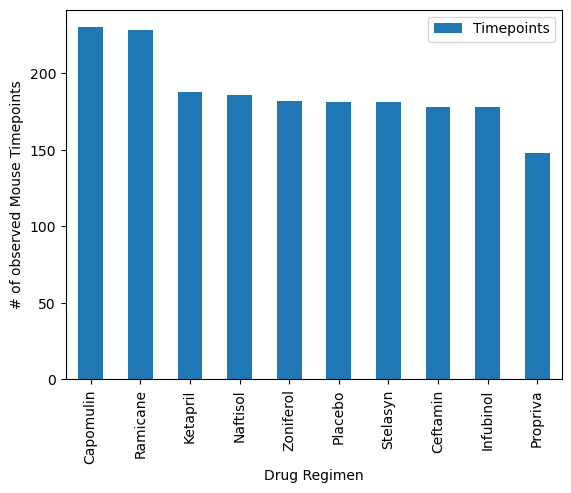

In [8]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

info=grouped_drug["Mouse ID"].size()
info=info.sort_values(ascending=False)
#Creating Data Frame
info_df=pd.DataFrame({'Timepoints':info})
ax = info_df.plot.bar()
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")

Text(38.097222222222214, 0.5, '# of observed Mouse Timepoints')

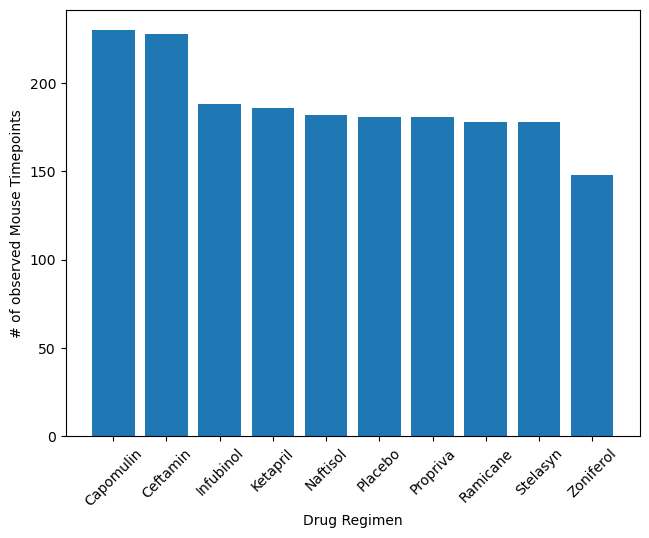

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
#Seting axis
x_axis=grouped_drug["Drug Regimen"].first()
y_axis=grouped_drug["Mouse ID"].size()

#Sort data highest to lowest
y_axis=y_axis.sort_values(ascending=False)
#bar chart rotate ticks so they fit the chart
bar_chart=plt.bar(x_axis,y_axis)
plt.tight_layout()

plt.xticks(rotation=45)
plt.xlabel("Drug Regimen")
plt.ylabel("# of observed Mouse Timepoints")


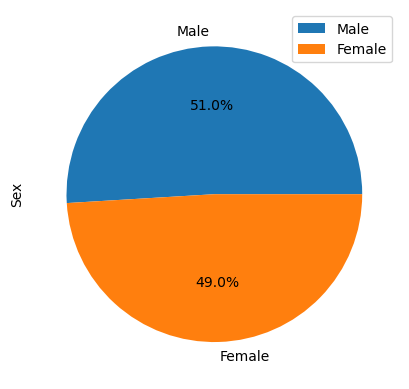

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
sex=unique_combined_data["Sex"].value_counts()
sex
label0=["Male","Female"]
sex_df=pd.DataFrame({'Sex':sex})
plot = sex_df.plot.pie(y='Sex', autopct="%1.1f%%")

Text(0, 0.5, 'Sex')

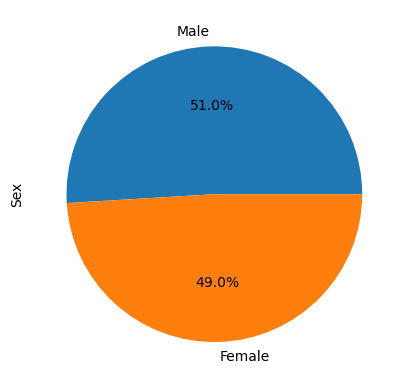

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
sex=unique_combined_data["Sex"].value_counts()
#percentage calculation
sex_total=len(unique_combined_data["Sex"])
percentage=sex/sex_total*100

label0=["Male","Female"]
plt.pie(percentage,labels=label0, autopct="%1.1f%%")
plt.ylabel('Sex')

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
#Gruup by mice and pass the max timepoint
timepoint45=unique_combined_data.groupby(['Mouse ID'],as_index=False)['Timepoint'].max()

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merge_timepoint=pd.merge(unique_combined_data,timepoint45,on=["Mouse ID","Timepoint"],how="right")
merge_timepoint

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [13]:

# Put treatments into a list for for loop (and later for plot labels)
treatments=["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting) it is actualy a list of lists[0]-Capomulin etc
tumor_vol_data=[]

for treatment in treatments:
    a1=merge_timepoint.loc[merge_timepoint["Drug Regimen"]==treatment]
    tumor_vol_data.append(a1["Tumor Volume (mm3)"])

#---------------------------------crating dataframe for easier manage of list of lists-------------------
Capomulin=tumor_vol_data[0]
Ramicane=tumor_vol_data[1]
Infubinol=tumor_vol_data[2]
Ceftamin=tumor_vol_data[3]
vol_data_df=pd.DataFrame({"Capomulin":Capomulin,"Ramicane":Ramicane,"Infubinol":Infubinol,"Ceftamin":Ceftamin})


#------------------------------------------------------------
# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for treatment0 in treatments:
    quartiles = vol_data_df[treatment0].quantile([.25,.5,.75]) 
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    a=vol_data_df.loc[(vol_data_df[treatment0]>upper_bound)|(vol_data_df[treatment0]<lower_bound)]
    b=[]
    b=a[treatment0]
    print(f"{treatment0} potential outliers {b}") 

Capomulin potential outliers Series([], Name: Capomulin, dtype: float64)
Ramicane potential outliers Series([], Name: Ramicane, dtype: float64)
Infubinol potential outliers 31    36.321346
Name: Infubinol, dtype: float64
Ceftamin potential outliers Series([], Name: Ceftamin, dtype: float64)


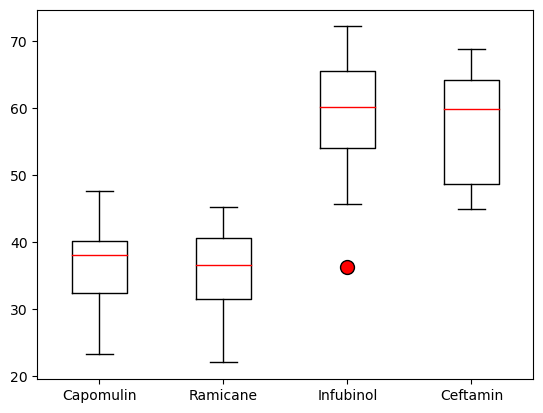

In [14]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
#pandas box plot
bplot=vol_data_df.boxplot(color=dict(boxes='k', whiskers='k', medians='r', caps='k'),flierprops={'marker': 'o', 'markersize': 10, 'markerfacecolor': 'red'})
bplot.grid(False)


## Line and Scatter Plots

Text(0.5, 1.0, 'Capomulin treatment of mouse l509')

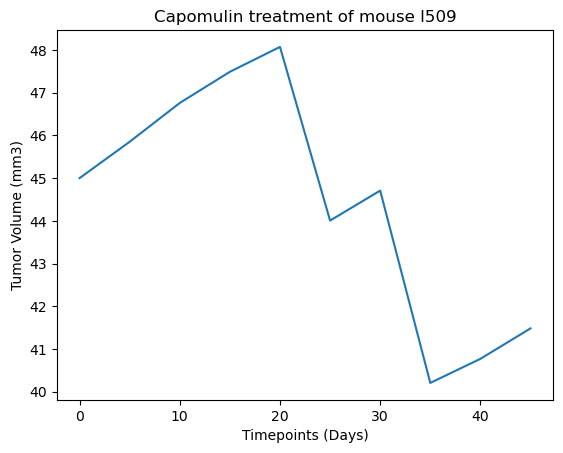

In [15]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin Mouse 1509
y_axis=unique_combined_data.loc[unique_combined_data["Mouse ID"]=="l509"]["Tumor Volume (mm3)"]
x_axis=unique_combined_data.loc[unique_combined_data["Mouse ID"]=="l509"]["Timepoint"]
plt.plot(x_axis,y_axis)
plt.xlabel("Timepoints (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Capomulin treatment of mouse l509")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

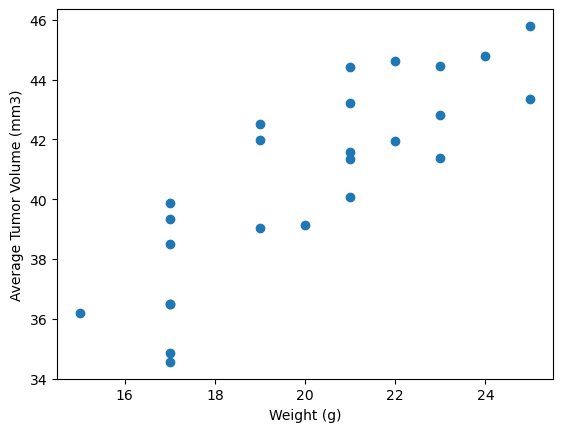

In [16]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

x_axis=merge_timepoint.loc[merge_timepoint["Drug Regimen"]=="Capomulin"]["Weight (g)"]
y_axis=unique_combined_data.groupby(["Mouse ID","Drug Regimen"],as_index=False)["Tumor Volume (mm3)"].mean()
y_axis_df=pd.DataFrame(y_axis)
y_axis=y_axis.loc[y_axis["Drug Regimen"]=="Capomulin"]["Tumor Volume (mm3)"]
plt.scatter(x_axis,y_axis)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is  0.84


Text(0, 0.5, 'Average Tumor Volume (mm3)')

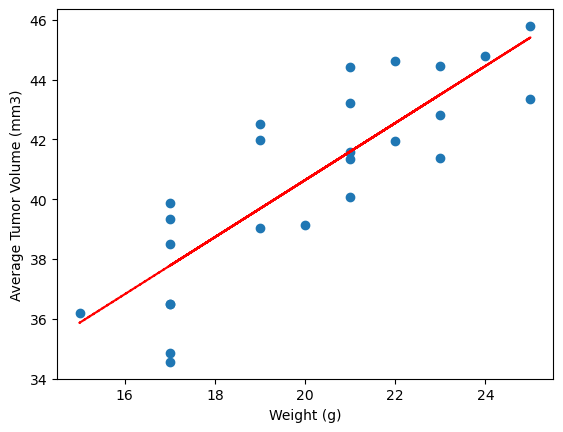

In [17]:
# Calculate the correlation coefficient and a linear regression model 
print(f"The correlation between mouse weight and the average tumor volume is  {round(st.pearsonr(x_axis,y_axis)[0],2)}")
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
pe_slope,pe_int,pe_r,pe_p,pe_std_err=st.linregress(x_axis,y_axis)
pe_fit=pe_slope*x_axis+pe_int
plt.scatter(x_axis,y_axis)
plt.plot(x_axis,pe_fit,"--",color="red")
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")